# A2: Unsupervised Analysis
Taylor Swearingen
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In this analysis we will be conducting a principal analysis and trying to understand what we see with Apprentice Chef, Inc.'s customers and their preferences. 
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# importing the packages needed
import numpy             as np                   
import pandas            as pd                   
import matplotlib.pyplot as plt                  
import seaborn           as sns                  
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA    

# specifying the path and file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
Chef = pd.read_excel(file)

# checking the file
Chef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205


After importing the chef data set, we can see that there are many variables that can be removed. We remove the variables that are not continuous in order to get a better understanding of the data and the likeness of the features.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [2]:
# creating Continuous variables and response variables subset
continuous_x_variables = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                           'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                           'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_BEFORE_NOON',
                           'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
                           'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                           'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
                           'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                           'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']

y_variable = ['REVENUE']

In [12]:
# scree_plot function

def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    # displaying the plot
    plt.show()


# unsupervised_scaler function

def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [5]:
#creating a new dataframe from the continuous variables
continuous_chef_df = Chef.loc[:, continuous_x_variables]

# scaling the data to be normalized
scaled_features = scaler(continuous_chef_df)

# checking pre- and post-scaling variance
print(np.var(Chef), '\n\n')
print(np.var(scaled_features))

REVENUE                        1.295040e+06
CROSS_SELL_SUCCESS             2.180204e-01
TOTAL_MEALS_ORDERED            3.057600e+03
UNIQUE_MEALS_PURCH             6.257663e+00
CONTACTS_W_CUSTOMER_SERVICE    5.201168e+00
PRODUCT_CATEGORIES_VIEWED      9.261178e+00
AVG_TIME_PER_SITE_VISIT        3.884497e+03
MOBILE_NUMBER                  1.073443e-01
CANCELLATIONS_BEFORE_NOON      2.400263e+00
CANCELLATIONS_AFTER_NOON       1.867359e-01
TASTES_AND_PREFERENCES         2.040816e-01
PC_LOGINS                      3.371049e-01
MOBILE_LOGINS                  2.782182e-01
WEEKLY_PLAN                    1.841399e+02
EARLY_DELIVERIES               5.373137e+00
LATE_DELIVERIES                7.528947e+00
PACKAGE_LOCKER                 2.290003e-01
REFRIGERATED_LOCKER            1.002716e-01
AVG_PREP_VID_TIME              2.443767e+03
LARGEST_ORDER_SIZE             2.400232e+00
MASTER_CLASSES_ATTENDED        4.117799e-01
MEDIAN_MEAL_RATING             5.720404e-01
AVG_CLICKS_PER_VISIT           5

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


This step has scaled the data to being all on the same level. We want to make sure each feature is represented fairly in comparison to the other features.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [7]:
# creating pca object
pca = PCA(n_components = None,
          random_state = 219)


# transforming the data
chef_pca = pca.fit_transform(scaled_features)

In [9]:
# adding pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(scaled_features.columns)


# checking the chart
print(factor_loadings_df)

                               0     1     2     3     4     5     6     7   \
CROSS_SELL_SUCCESS           0.03  0.22 -0.46  0.29  0.05  0.30  0.05  0.02   
TOTAL_MEALS_ORDERED          0.36 -0.02  0.02 -0.06 -0.07 -0.07  0.04  0.09   
UNIQUE_MEALS_PURCH           0.07  0.06  0.24  0.39 -0.12 -0.17  0.38  0.16   
CONTACTS_W_CUSTOMER_SERVICE  0.01  0.05 -0.25  0.18  0.28 -0.47  0.31 -0.08   
PRODUCT_CATEGORIES_VIEWED    0.01  0.01 -0.07 -0.05 -0.54  0.08  0.42  0.06   
AVG_TIME_PER_SITE_VISIT      0.18 -0.03  0.32  0.35  0.14  0.08  0.12 -0.04   
CANCELLATIONS_BEFORE_NOON    0.01  0.25 -0.38  0.14  0.12  0.13  0.19  0.39   
CANCELLATIONS_AFTER_NOON    -0.02 -0.00  0.28 -0.15  0.41  0.01 -0.08  0.44   
TASTES_AND_PREFERENCES       0.00  0.00 -0.16  0.41 -0.16  0.30 -0.35 -0.14   
PC_LOGINS                    0.01 -0.01 -0.25 -0.18  0.40  0.17 -0.03 -0.34   
MOBILE_LOGINS               -0.00 -0.10  0.21 -0.20 -0.02  0.30  0.17 -0.05   
WEEKLY_PLAN                  0.02 -0.03  0.13  0.34 

There are many factor loadings produced from this dataset. Below we will plot to get a better understanding of the factor loadings and which ones may be as significant to our analysis.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

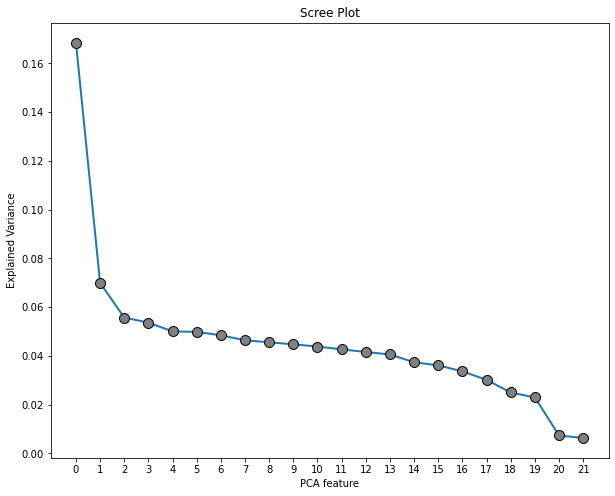

In [13]:
# calling the scree_plot function
scree_plot(pca_object = pca,
           export     = True)

From this plot, we can see that the difference in explained variance decreases significantly after the second principal component feature. This means we can narrow our principal component features to show the most explained variance.

In [14]:
# creating pca object
pca_limited = PCA(n_components = 3,
                  random_state = 219)


# transforming the data
chef_pca_limited = pca_limited.fit_transform(scaled_features)

# adding pca components
factor_loadings_limited_df = pd.DataFrame(np.transpose(pca_limited.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_limited_df = factor_loadings_limited_df.set_index(scaled_features.columns)


# checking the chart
print(factor_loadings_limited_df)

                                0     1     2
CROSS_SELL_SUCCESS           0.03  0.22 -0.42
TOTAL_MEALS_ORDERED          0.36 -0.02  0.02
UNIQUE_MEALS_PURCH           0.07  0.06  0.24
CONTACTS_W_CUSTOMER_SERVICE  0.01  0.07 -0.24
PRODUCT_CATEGORIES_VIEWED    0.01  0.03 -0.11
AVG_TIME_PER_SITE_VISIT      0.18 -0.02  0.35
CANCELLATIONS_BEFORE_NOON    0.01  0.23 -0.36
CANCELLATIONS_AFTER_NOON    -0.02  0.01  0.25
TASTES_AND_PREFERENCES       0.00 -0.02 -0.12
PC_LOGINS                    0.01 -0.02 -0.27
MOBILE_LOGINS               -0.00 -0.11  0.22
WEEKLY_PLAN                  0.02 -0.03  0.15
EARLY_DELIVERIES            -0.01  0.05 -0.04
LATE_DELIVERIES             -0.01 -0.06  0.14
PACKAGE_LOCKER               0.01  0.66  0.17
REFRIGERATED_LOCKER          0.02  0.65  0.16
AVG_PREP_VID_TIME            0.44 -0.02  0.12
LARGEST_ORDER_SIZE           0.37 -0.02  0.18
MASTER_CLASSES_ATTENDED      0.31  0.01  0.04
MEDIAN_MEAL_RATING           0.41 -0.00 -0.17
AVG_CLICKS_PER_VISIT        -0.39 

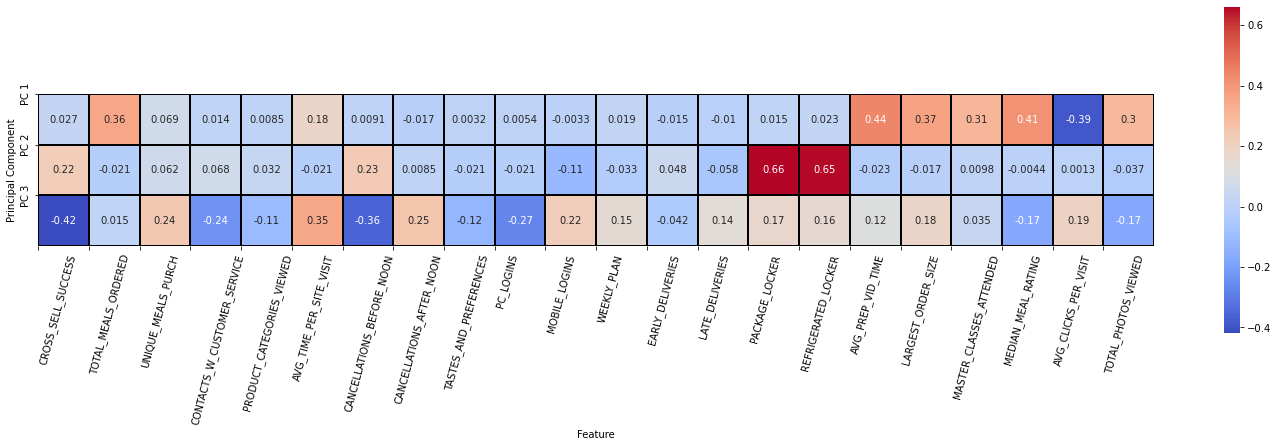

In [23]:
# setting plot size
fig, ax = plt.subplots(figsize = (25, 6))


# developing a PC to feature heatmap
sns.heatmap(pca_limited.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2],
           ["PC 1", "PC 2", "PC 3"])

plt.xticks(range(0, 22),
           scaled_features.columns,
           rotation=75,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

# Explaining the Results <br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<b>PC1</b> : <br>
For the first principal component, we can see the higher values show that the customer researched the meals in great detail and spent time on the preparation in order to make their meals great. Their reviews are higher because of this high average time of research and preparation. We also see that their clicks are not as high showing that they may be familiar with their wants, which also shows in the low number of unique meals they purchase. On the opposite side of the first principal component, we see customers that are more spontaneous with their meal choices. They prefer a variety of meals, and they order unique meals more often. They do not usually take part of our cross selling and have more cancellations. These customers are more willing to try new flavors and want the meal for the convenience and less for the perfection. If these customers are going to cancel, we can expect it to be before noon and this is shown in the package and refrigerated locker number being used more frequently for these customers. 

<b>PC2</b> : <br>
When looking at the second principal component we can see our higher values signaling that Apprentice Chef Inc has customers that may be more schedule oriented than anything. They typically buy what we recommend in our cross-selling tactics and may not know when they will be making the meals. There are more cancellations before noon and more package and refrigerated lockers used for these customers. They may be placing the order without thinking of their schedule or have schedule that are not set before they order. This would cause the customers to cancel and need the storage lockers to keep their meals ready for a different day they would have time to cook. The other customers we see are more planned and schedule their meals to be delivered when they absolutely know they will have time and energy to make the meals from Apprentice Chef. They do not necessarily try the weekly plans because they know their schedules may change and want to ensure they are not having to cancel any meals. These customers also enjoy an early delivery and dislike late deliveries. This is more than likely due to the fact that their schedules are easier to manage when time frames work correctly. 

<b>PC3</b> : <br>
In our third principal component, we can see that the customers have many attributes. One side of the customers are looking at the variety that Apprentice Chef has, and they are trying several of the meals we have. They typically do not purchase a meal that our cross-selling techniques recommend for them. They prefer to buy the unique meals and they are more likely to cancel after noon. These cancellations lead to a higher level of package lockers and refrigerated lockers. These customers also prefer to use their mobile devices to order and are more likely to use a weekly plan schedule. Even though they are adventurous in their meal choices, preferring to try different meals and unique meals, it still seems that these customers have more contacts with customer service. These calls may be because their meal ratings are lower, or they seem to have more instances of late deliveries. On the other side of these customers, we have the customers that are less engaged in Apprentice Chef. We see the meals they have ordered is not as high and they do not interact with the rest of what Apprentice Chef has to offer, this being videos, photos, or classes Apprentice Chef offers. These customers have a positive outlook on the meals they order and may use Apprentice Chef's services at a minimum. They are more likely to order these meals for simplicity and not have high expectations for the outcome of the meal, since they are making it themselves. 
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
